In [12]:
!pip install mglearn
#파이썬에 있는 가상 데이터 가져오는 것 

In [13]:
import mglearn

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [15]:
x, y = mglearn.datasets.make_forge()

In [16]:
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

X.shape: (26, 2)


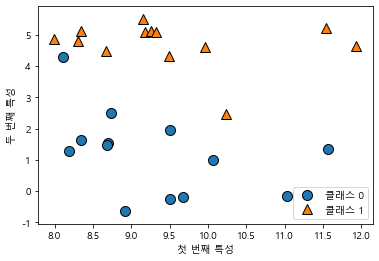

In [17]:
mglearn.discrete_scatter(x[:, 0], x[:, 1], y)
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
print("X.shape:", x.shape)
plt.show()

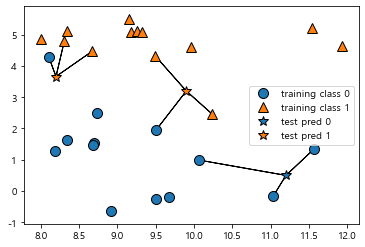

In [18]:
mglearn.plots.plot_knn_classification(n_neighbors=3)
#임의의 데이터3개를 추가하고 knn을 돌려서 별들의 클래스를 알려줌

In [19]:
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)

In [20]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import mglearn
import matplotlib.pyplot as plt
from matplotlib import rc

x, y = mglearn.datasets.make_forge()
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)

In [22]:
print('테스트 세트 예측 :',model.predict(x_test))
print('테스트 세트 정확도 : {:.2f}'.format(model.score(x_test, y_test)))

NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

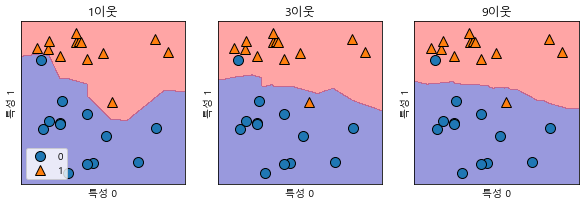

In [23]:
gif, axes = plt.subplots(1,3, figsize=(10,3))

for n_neighbors, ax in zip([1,3,9], axes) :
    
    model = KNeighborsClassifier(n_neighbors= n_neighbors).fit(x,y)
    mglearn.plots.plot_2d_separator(model, x, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(x[:,0], x[:,1], y, ax=ax)
    ax.set_title('{}이웃'.format(n_neighbors))
    ax.set_xlabel('특성 0')
    ax.set_ylabel('특성 1')
axes[0].legend(loc=3)

In [24]:
data = [1,2,3,4,5,6,7,8,9,10,25,77,38.5]

In [25]:
max_value=np.max(data)
min_value=np.min(data)

min_max_scaling=[]
for i in data:
    min_max_scaling.append((i-min_value)/(max_value-min_value))
min_max_scaling

[0.0,
 0.013157894736842105,
 0.02631578947368421,
 0.039473684210526314,
 0.05263157894736842,
 0.06578947368421052,
 0.07894736842105263,
 0.09210526315789473,
 0.10526315789473684,
 0.11842105263157894,
 0.3157894736842105,
 1.0,
 0.4934210526315789]

In [26]:
from sklearn.preprocessing import MinMaxScaler
data=np.array(data)
scaler = MinMaxScaler()
scaler.fit(data.reshape(-1,1))
scaled_data = scaler.transform(data.reshape(-1,1))
print(scaled_data)

[[0.        ]
 [0.01315789]
 [0.02631579]
 [0.03947368]
 [0.05263158]
 [0.06578947]
 [0.07894737]
 [0.09210526]
 [0.10526316]
 [0.11842105]
 [0.31578947]
 [1.        ]
 [0.49342105]]


In [27]:
print(scaler.n_samples_seen_)
print(scaler.data_min_)
print(scaler.data_max_)

13
[1.]
[77.]


#### 모델 설계 코드 짜기

In [28]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

In [29]:
cancer = load_breast_cancer()

In [30]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [31]:
for i in cancer.keys():
    try:
        print(len(cancer[i]))
    except:
        print("no")

569
569
no
2
5044
30
17
21


In [32]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [33]:
data = pd.DataFrame(cancer["data"],columns=F
target=pd.DataFrame(cancer["target"],columns=["target"])
can=pd.concat([data,target],axis=1)
can

SyntaxError: invalid syntax (2101834438.py, line 2)

In [34]:
can["target"].value_counts(0)

NameError: name 'can' is not defined

In [35]:
x_train,x_test,y_train,y_test= train_test_split(can[cancer["feature_names"]],can["target"],random_state=0,stratify=cancer.target)


NameError: name 'can' is not defined

In [36]:
can

NameError: name 'can' is not defined

In [37]:
can[['mean radius','mean texture']]

NameError: name 'can' is not defined

In [38]:
list(cancer['feature_names'])

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

In [39]:
from tqdm import tqdm

100%|██████████| 15/15 [00:00<00:00, 715.07it/s]


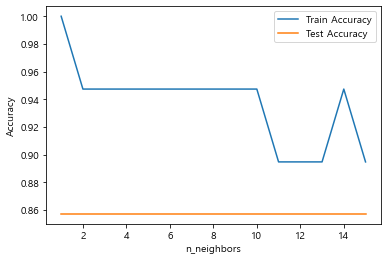

In [40]:
train_acc=[]
test_acc=[]

for i in tqdm(range(1,16)):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    
    train_acc.append(model.score(x_train,y_train))
    test_acc.append(model.score(x_test,y_test))
    
plt.plot(range(1,16),train_acc,label="Train Accuracy")
plt.plot(range(1,16),test_acc,label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

최적의 파라미터는 두 개의 간격이 좁은 7 또는 15 정도가 좋을 것 같음

In [41]:
test_acc[6]

0.8571428571428571

#### k=1~15 test_acc가 최대가 되는 최적의 하이퍼파라미터를 찾으세요.
- 과소적합이 아닌 조건 : Test accuracy가 높다.
- 과대적합이 아닌 조건 : train과 test의 accuracy 차이가 적다.

In [42]:
best_train_acc=0
best_test_acc=0

for i in tqdm(range(1,16)):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    
    test_acc=model.score(x_test,y_test)
    if test_acc>best_test_acc:
        best_test_acc=test_acc
        best_k=i
    else:
        pass
print(best_k)

100%|██████████| 15/15 [00:00<00:00, 1453.60it/s]

1


In [43]:
best_train_acc = 0
best_test_acc = 0
best_k = 0
for i in tqdm(range(1, 16)):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(x_train, y_train)
    
    train_acc = model.score(x_train, y_train)
    test_acc = model.score(x_test, y_test)
    
    if test_acc>best_test_acc:
        best_test_acc = test_acc
        best_train_acc = train_acc
        best_k = i #하이퍼파라미터가 됨
    elif best_test_acc == test_acc:
        if abs(best_train_acc - best_test_acc) > abs(train_acc - test_acc):
            best_test_acc = test_acc
            best_train_acc = train_acc
            best_k = i
        else:
            pass
    else:
        pass
print(best_k)

100%|██████████| 15/15 [00:00<00:00, 879.43it/s]

11


In [44]:
#최적의 파라미터 구하기
#-> 과대적합도 되지 않고 과소적합도 되지않는 파라미터!
#test_acc가 가장 높은 상태
#혹시 동점이라면 과대적합이 아니어야함
#train_acc와 test_acc의 격차가 가장 적은 것 찾기

#즉, 위의 조건을 모두 만족하는 파라미터를 찾으면 됨

best_train_acc = 0
best_test_acc = 0
best_k = 0

for i in tqdm(range(1, 16)):
    #모델선언
    model = KNeighborsClassifier(n_neighbors = i)
    #선언한 모델 학습시키기
    model.fit(x_train, y_train)
    
    #결과물 
    train_acc = model.score(x_train, y_train)
    test_acc = model.score(x_test, y_test)
    
    #현재의 test_acc와 역대 최고의 test_acc와 비교
    if best_test_acc < test_acc:
        #신기록이 나왔다면 test_acc를 best_test_acc에 저장
        best_test_acc = test_acc
         
        #신기록이 나왔을 때의 train_acc를 best_train_acc에 저장
        best_train_acc = train_acc
        #신기록이 나왔을 때의 파라미터를 저장
        best_k = i

    #동점일 경우엔 다른 기준을 넣어서 비교하여야 한다.(과대적합이 아닌 것을 찾는다)
    elif best_test_acc == test_acc:
        if abs(best_train_acc - best_test_acc) > abs(train_acc - test_acc):
            
            best_test_acc = test_acc
            best_train_acc = train_acc
            best_k = i
        else:
            pass
    else:
        pass
print(best_k)

100%|██████████| 15/15 [00:00<00:00, 909.67it/s]

11
